In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = load_boston()

/home/vtex/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/tmp/ipykernel_32921/2109380694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston.target)


Text(0, 0.5, 'Number of houses')

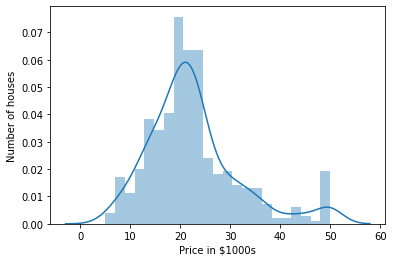

In [8]:
sns.distplot(boston.target)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')


Text(0.5, 0, 'Number of rooms')

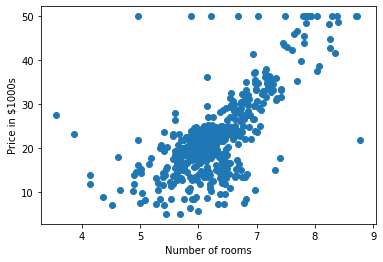

In [14]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [ ]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names


In [16]:
boston_df['Price'] = boston.target

In [18]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


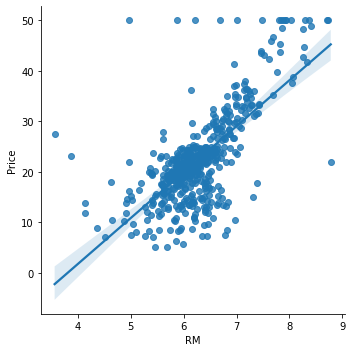

In [20]:
sns.lmplot(data=boston_df,x='RM',y='Price',)

In [22]:
X = boston_df.RM
X.shape

(506,)

In [24]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [25]:
Y = boston_df.Price

In [26]:
Y.shape

(506,)

In [28]:
X = np.array([[value,1] for value in X])

/tmp/ipykernel_32921/2160958778.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[value,1] for value in X])


In [29]:
X.shape

(506, 2)

In [33]:
X = X.astype('float64')

In [34]:
m,b = np.linalg.lstsq(X,Y)[0]#calcula os coeficientes da reta

/tmp/ipykernel_32921/324140955.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,b = np.linalg.lstsq(X,Y)[0]


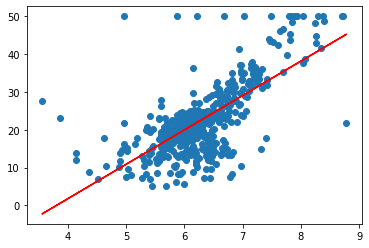

In [35]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x+b,'r',label='best fit line')

In [36]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X) )
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


/tmp/ipykernel_32921/4011611281.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [41]:
print(m,b)

9.102108981180313 -34.67062077643857


# Sklearn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lreg = LinearRegression()

In [39]:
lreg.fit(X,Y)

LinearRegression()

In [40]:
lreg.intercept_,lreg.coef_

(-34.670620776438625, array([9.10210898, 0.        ]))

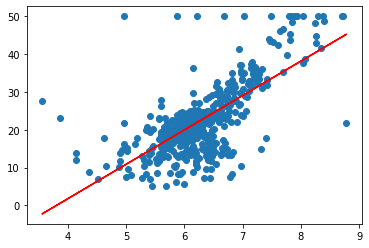

In [43]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,(lreg.coef_[0])*x+lreg.intercept_,'r',label='best fit linefrom sklearn')

In [44]:
X_multi = boston_df.drop('Price',1)

/tmp/ipykernel_32921/2230572587.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = boston_df.drop('Price',1)


In [45]:
lreg.fit(X_multi,Y)

LinearRegression()

In [46]:
lreg.intercept_

36.459488385089955

In [47]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [48]:
coeff = pd.DataFrame(boston_df.columns)
coeff.columns = ['Features']

coeff['coeff estimate'] = pd.Series(lreg.coef_)

In [51]:
coeff

,Features,coeff estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)


In [54]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(379, 2) (127, 2) (379,) (127,)


In [55]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [57]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [58]:
np.mean((Y_train-pred_train)**2)

42.2755255231859

In [59]:
np.mean((Y_test-pred_test)**2)

47.88885289238877

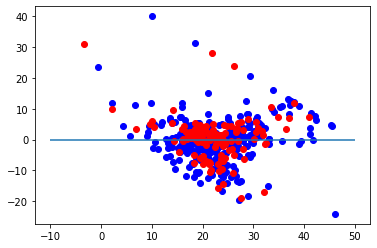

In [61]:
plt.scatter(pred_train,(Y_train-pred_train),c='b')
plt.scatter(pred_test,(Y_test-pred_test),c='r')
plt.hlines(y=0,xmin=-10,xmax=50)

<AxesSubplot: xlabel='RM', ylabel='Price'>

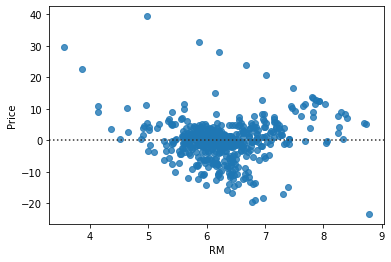

In [62]:
sns.residplot(boston_df,x='RM',y='Price')